The following shows running a simple steady-state diffusion benchmark running on 2 cores.

In [8]:
import os

prj_name = "square_1e1_neumann"
prj_file = f"{os.getcwd()}/../Data/EllipticPETSc/{prj_name}.prj"
out_dir = f"_out/{prj_name}"

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

! mpirun -np 2 ogs -o {out_dir} {prj_file} > out.log

Text(0, 0.5, 'p')

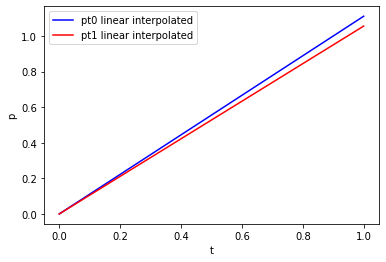

In [10]:
import vtuIO

pvdfile = vtuIO.PVDIO(f"{out_dir}/{prj_name}.pvd", dim=2)
time = pvdfile.timesteps
points={'pt0': (0.3,0.5,0.0), 'pt1': (0.24,0.21,0.0)}
pressure_linear = pvdfile.read_time_series("pressure", points)

import matplotlib.pyplot as plt
plt.plot(time, pressure_linear["pt0"], "b-", label="pt0 linear interpolated")
plt.plot(time, pressure_linear["pt1"], "r-", label="pt1 linear interpolated")
plt.legend()
plt.xlabel("t")
plt.ylabel("p")